# Evaluate performace of `kissim` vs. pooled EGFR profiling data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src import data, evaluation

## Define parameters

In [2]:
# The only global that can be changed in this notebook
LIGAND_PROFILING_METHOD = "karaman"

In [3]:
KINASE_DISTANCES_METHOD = "kissim"
KINASE_ACTIVITY_CUTOFF = 100
KINASE_ACTIVITY_MAX = True
MIN_N_SHARED_KINASES = 10
MIN_N_SHARED_ACTIVE_KINASES = 3

## Ligand-kinase pairs

In [4]:
# Kinase-kinase distances dataset
kissim_df = data.distances.kissim(structure_kinase_mapping_by="minimum", kinmap_kinases=True)
# Kinase-ligand profiling dataset
profiling_df = data.profiling.load(LIGAND_PROFILING_METHOD, pkidb_ligands=True, fda_approved=True)

ligand_names = profiling_df.columns
ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
ligand_kinase_pairs = (
    ligand_targets[["ligand.input", "targets.kinmap"]]
    .explode("targets.kinmap")
    .to_numpy()
    .tolist()
)

Changed kinase names (unknown names may be discarded - see function docstring):
    kinase.input            kinase.kinmap
73         DCLK1                  DCAMKL1
133       JAK1-b                   JAK1_b
135       JAK2-b                   JAK2_b
176       MSK1-b                   MSK1_b
200       PI4K2A  unknown (not in KinMap)
201       PI4K2B  unknown (not in KinMap)
202        PI4KB  unknown (not in KinMap)
203       PIK3C3  unknown (not in KinMap)
236       RSK1-b                   RSK1_b
238       RSK2-b                   RSK2_b
267       TYK2-b                   TYK2_b
284        p110a  unknown (not in KinMap)
285        p110d  unknown (not in KinMap)
286        p110g  unknown (not in KinMap)
Changed ligand names (unknown names may be discarded - see function docstring):
           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PK

### Keep all ligand-EGFR pairs

In [5]:
ligand_kinase_pairs = [pair for pair in ligand_kinase_pairs if pair[1] == "EGFR"]
ligand_kinase_pairs

[['Canertinib', 'EGFR'],
 ['Erlotinib', 'EGFR'],
 ['Gefitinib', 'EGFR'],
 ['Lapatinib', 'EGFR'],
 ['Pelitinib', 'EGFR'],
 ['Vandetanib', 'EGFR']]

## Merge pooled EGFR profiling and `kissim` data

In [6]:
evaluator = evaluation.LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    LIGAND_PROFILING_METHOD,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
)

Changed ligand names (unknown names may be discarded - see function docstring):
           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol  unknown (not in PKIDB)
24              MLN-518              Tandutinib
25      

In [7]:
evaluator.data_dict["Erlotinib"]["EGFR"].data

,karaman.measure,karaman.active,karaman.rank1,karaman.rank2,kissim.measure,kissim.rank1,kissim.rank2
kinase,,,,,,,
EGFR,0.67,True,1.0,1.0,0.000000,1.0,1.0
ErbB4,230.00,False,7.0,6.0,0.058818,2.0,2.0
ABL1,310.00,False,9.0,8.0,0.136113,8.0,3.0
RET,1300.00,False,28.5,20.5,0.139980,10.0,4.0
EphA3,2400.00,False,40.0,29.0,0.143503,12.0,5.0
LOK,19.00,True,3.0,3.0,0.144295,13.0,6.0
ALK,1200.00,False,26.0,18.0,0.144804,15.0,7.0
ABL2,200.00,False,6.0,5.0,0.145956,17.0,8.0
HCK,1800.00,False,33.5,25.5,0.151468,21.0,9.0


In [8]:
def pool_egfr_profiling_data(evaluator):
    """
    Pool EGFR profiling data from multiple kinase inhibitors with EGFR as on-target.

    Parameters
    ----------
    evaluator : src.evaluation.LigandVsKinaseEvaluator
        Profiling vs. kissim data for different EGFR inhibitors.

    Returns
    -------
    pandas.DataFrame

    """

    dd = []
    for ligand_name, data in evaluator.data_dict.items():
        ddd = data["EGFR"].data
        ddd["ligand.name"] = ligand_name
        dd.append(ddd)
    dd = pd.concat(dd).reset_index().sort_values(["kinase", "karaman.measure"])

    # Save all profiling measures
    profiling_measures = dd.groupby("kinase")["karaman.measure"].apply(list)
    profiling_measures.name = "karaman.measures_list"
    profiling_measures = profiling_measures.reset_index()

    # Drop duplicated rows and unused columns
    dd = dd.drop_duplicates(subset="kinase", keep="first")
    dd = dd.drop(["karaman.rank1", "karaman.rank2", "kissim.rank1", "kissim.rank2"], axis=1)

    # Add profiling measures to DataFrame
    dd = dd.merge(profiling_measures, on="kinase").set_index("kinase")

    # Add kissim rank and sort by best profiling value
    dd["kissim.rank"] = dd["kissim.measure"].rank()
    dd = dd.sort_values("karaman.measure")

    return dd

In [9]:
pooled_egfr_profiling = pool_egfr_profiling_data(evaluator)

### Check ranks for on-/off-targets

In [10]:
print(f"Number of kinases: {pooled_egfr_profiling.shape[0]}")
pooled_egfr_profiling[pooled_egfr_profiling["karaman.active"]]

Number of kinases: 98


,karaman.measure,karaman.active,kissim.measure,ligand.name,karaman.measures_list,kissim.rank
kinase,,,,,,
EGFR,0.19,True,0.000000,Canertinib,"[0.19, 0.44, 0.67, 1.0, 2.4, 9.5]",1.0
GAK,3.10,True,0.241922,Erlotinib,"[3.1, 6.4, 13.0, 86.0, 100.0]",88.0
RIPK2,4.60,True,0.218856,Vandetanib,"[4.6, 300.0, 530.0, 680.0, 3600.0]",77.0
ErbB2,7.00,True,0.101153,Lapatinib,"[7.0, 87.0, 500.0, 2600.0, 3500.0]",3.0
DDR1,11.00,True,0.173942,Vandetanib,"[11.0, 400.0, 790.0]",45.0
LCK,17.00,True,0.155125,Vandetanib,"[17.0, 99.0, 250.0, 320.0, 630.0]",22.0
LOK,19.00,True,0.144295,Erlotinib,"[19.0, 81.0, 330.0, 470.0, 1900.0, 4400.0]",12.0
ErbB4,21.00,True,0.058818,Pelitinib,"[21.0, 29.0, 54.0, 230.0, 410.0, 480.0]",2.0
SLK,26.00,True,0.159060,Erlotinib,"[26.0, 95.0, 360.0, 920.0, 1800.0]",31.0


In [11]:
pooled_egfr_profiling[pooled_egfr_profiling["karaman.measure"] <= 30][
    ["karaman.measure", "ligand.name", "kissim.rank", "karaman.measures_list"]
]

,karaman.measure,ligand.name,kissim.rank,karaman.measures_list
kinase,,,,
EGFR,0.19,Canertinib,1.0,"[0.19, 0.44, 0.67, 1.0, 2.4, 9.5]"
GAK,3.10,Erlotinib,88.0,"[3.1, 6.4, 13.0, 86.0, 100.0]"
RIPK2,4.60,Vandetanib,77.0,"[4.6, 300.0, 530.0, 680.0, 3600.0]"
ErbB2,7.00,Lapatinib,3.0,"[7.0, 87.0, 500.0, 2600.0, 3500.0]"
DDR1,11.00,Vandetanib,45.0,"[11.0, 400.0, 790.0]"
LCK,17.00,Vandetanib,22.0,"[17.0, 99.0, 250.0, 320.0, 630.0]"
LOK,19.00,Erlotinib,12.0,"[19.0, 81.0, 330.0, 470.0, 1900.0, 4400.0]"
ErbB4,21.00,Pelitinib,2.0,"[21.0, 29.0, 54.0, 230.0, 410.0, 480.0]"
SLK,26.00,Erlotinib,31.0,"[26.0, 95.0, 360.0, 920.0, 1800.0]"


### Rank kinases by `kissim` ranks

In [12]:
print(f"Number of kinases: {pooled_egfr_profiling.shape[0]}")
pooled_egfr_profiling.sort_values("kissim.rank").head(20)

Number of kinases: 98


,karaman.measure,karaman.active,kissim.measure,ligand.name,karaman.measures_list,kissim.rank
kinase,,,,,,
EGFR,0.19,True,0.000000,Canertinib,"[0.19, 0.44, 0.67, 1.0, 2.4, 9.5]",1.0
ErbB4,21.00,True,0.058818,Pelitinib,"[21.0, 29.0, 54.0, 230.0, 410.0, 480.0]",2.0
ErbB2,7.00,True,0.101153,Lapatinib,"[7.0, 87.0, 500.0, 2600.0, 3500.0]",3.0
SYK,7200.00,False,0.113142,Pelitinib,[7200.0],4.0
EphB1,290.00,False,0.133393,Vandetanib,[290.0],5.0
BTK,1600.00,False,0.135822,Canertinib,"[1600.0, 4900.0]",6.0
ABL1,270.00,False,0.136113,Vandetanib,"[270.0, 310.0, 560.0, 1400.0]",7.0
ITK,2500.00,False,0.139429,Pelitinib,"[2500.0, 5600.0]",8.0
RET,34.00,True,0.139980,Vandetanib,"[34.0, 1300.0, 4200.0]",9.0


## Plot ROC curve

In [13]:
class Data:
    def __init__(
        self,
        data,
        ligand_kinase_method,
        kinase_kinase_method,
        n_kinases_shared,
        n_active_kinases_shared,
    ):
        self.data = data
        self.ligand_kinase_method = ligand_kinase_method
        self.kinase_kinase_method = kinase_kinase_method
        self.n_kinases_shared = n_kinases_shared
        self.n_active_kinases_shared = n_active_kinases_shared

In [14]:
data = Data(
    pooled_egfr_profiling,
    "karaman",
    "kissim",
    pooled_egfr_profiling.shape[0],
    pooled_egfr_profiling[pooled_egfr_profiling["karaman.active"]].shape[0],
)

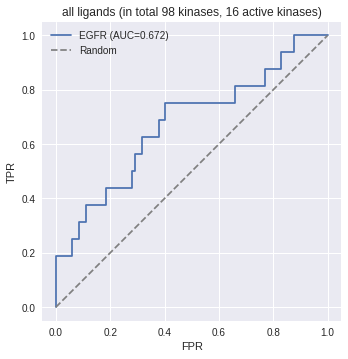

In [15]:
_, ax = plt.subplots(1, 1)
fpr, tpr, auc, n_kinases, n_active_kinases = evaluation.utils.roc_fpr_tpr_auc(data)
# Experimental curves
ax.plot(fpr, tpr, label=f"EGFR (AUC={round(auc, 3)})")
# Random curve
ax.plot([0, 1], [0, 1], label="Random", linestyle="--", color="grey")
ax.legend()
# Cosmetics
ax.set_aspect(1.0 / ax.get_data_ratio(), adjustable="box")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title(
    f"all ligands (in total {n_kinases} kinases, " f"{n_active_kinases} active kinases)",
);